In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [8]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████| 877973/877973 [00:26<00:00, 33155.73it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████| 407961/407961 [00:09<00:00, 40992.61it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37447.03it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


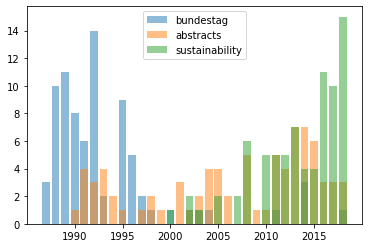

In [15]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=80))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

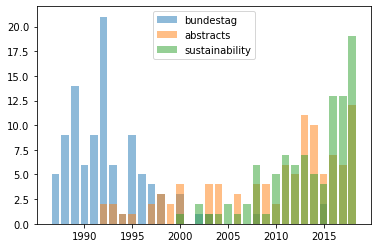

In [7]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

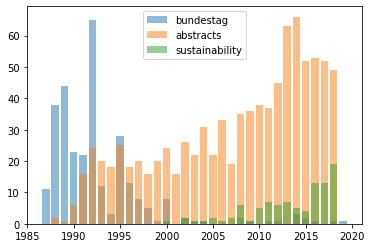

In [15]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [11]:
# extract keywords from documents in corpus and assign keywords to documents
keywords = KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|█████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 3365.46it/s]


In [ ]:
kwt = KeywordTranslator()

for d in corpus.get_documents():
    print(d.text[:100], '...\n  keywords:')
    for kw in d.keywords:
        print('    - \"'+str(kw)+'\"')
    print('\n')

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))